# Import neccessary libraries and dataset

**Dataset link**: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

**Dataset Description**:
The dataset describes the amount of various chemicals present in wine and their effect on it's quality

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
wine_qt=pd.read_csv('/content/drive/MyDrive/WineQT.csv')

In [ ]:
df=wine_qt.copy(deep=True)

# Data Exploration

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.shape

(1143, 13)

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [ ]:
df.nunique()

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64

In [ ]:
df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

# Data Cleaning

The column Id doesn't effect the Target column quality so removing Id column is preferred.

In [ ]:
df.drop('Id', axis=1,inplace=True)

In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
# There is duplicates in the data frame so we removed it
df.shape

(1018, 12)

# Exploratory Data Analysis

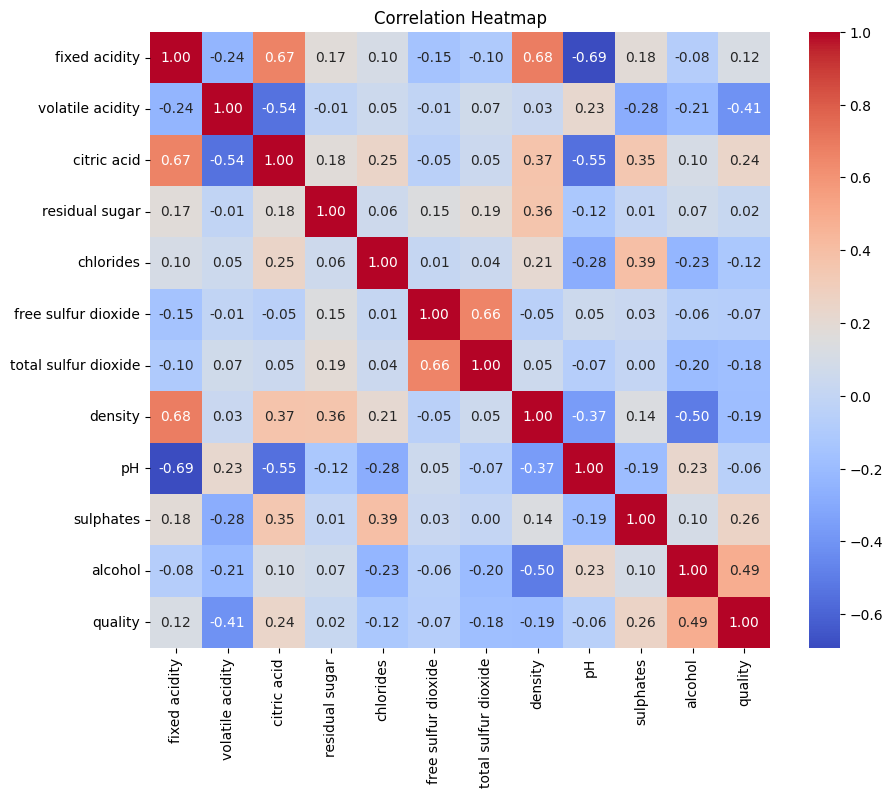

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

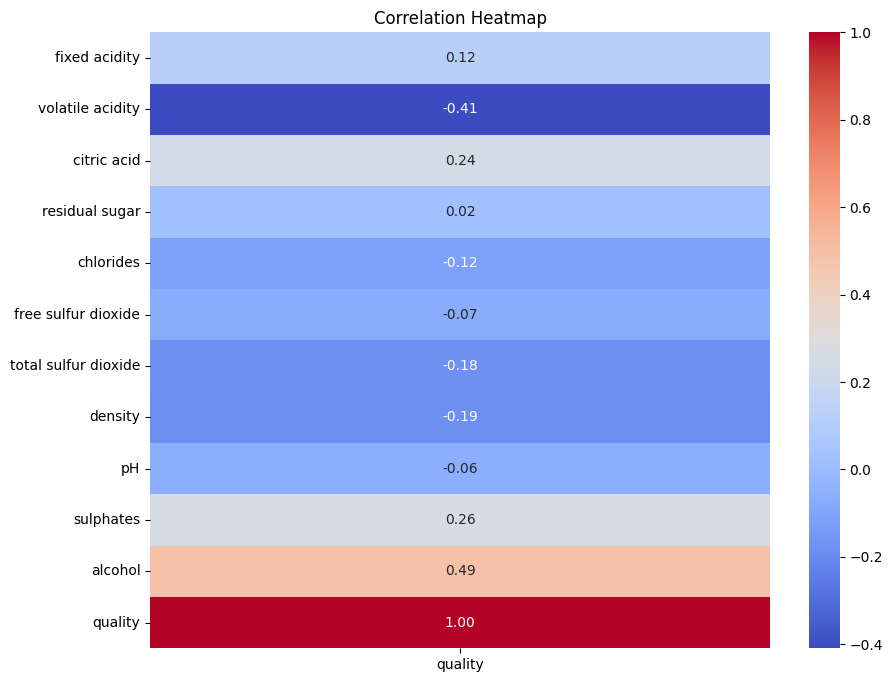

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr()[['quality']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X contains your features
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['quality'],axis=1))

# Perform PCA
pca = PCA(n_components=5)  # Choose the number of components
X_pca = pca.fit_transform(X_scaled)

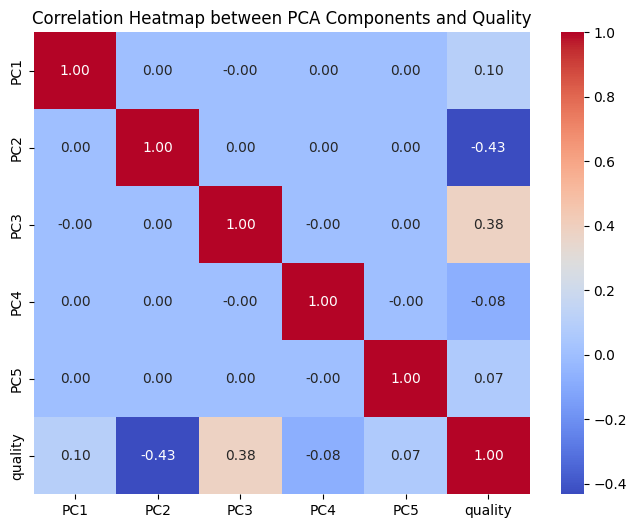

In [ ]:
# Create a DataFrame with PCA components and 'quality' column
pca_df = pd.DataFrame(data=np.column_stack((X_pca, df['quality'])), columns=['PC1', 'PC2','PC3','PC4','PC5', 'quality'])

# Calculate the correlation matrix
correlation_matrix = pca_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between PCA Components and Quality')
plt.show()

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df contains your dataset with features and target variable
# X contains features, and y contains the target variable (quality)
X = df.drop(['quality'], axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose SVR as the regression model
svr_model = SVR(kernel='rbf')  # You can experiment with different kernel functions

# Train the SVR model
svr_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.7137445049313642
R-squared: 0.17000052205483396


Random Forest is robust to class imbalance and can handle imbalanced datasets better than SVC without the need for additional techniques such as class weighting or resampling.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming df contains your dataset with features and target variable
# X contains features, and y contains the target variable (quality)
X = df.drop(['quality'], axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)


Random Forest Classifier Accuracy: 0.5343137254901961


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming df contains your dataset with features and target variable
# X contains features, and y contains the target variable (quality)
X = df.drop(['quality'], axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = best_rf_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)
print("Best Parameters:", best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Random Forest Classifier Accuracy: 0.5735294117647058
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


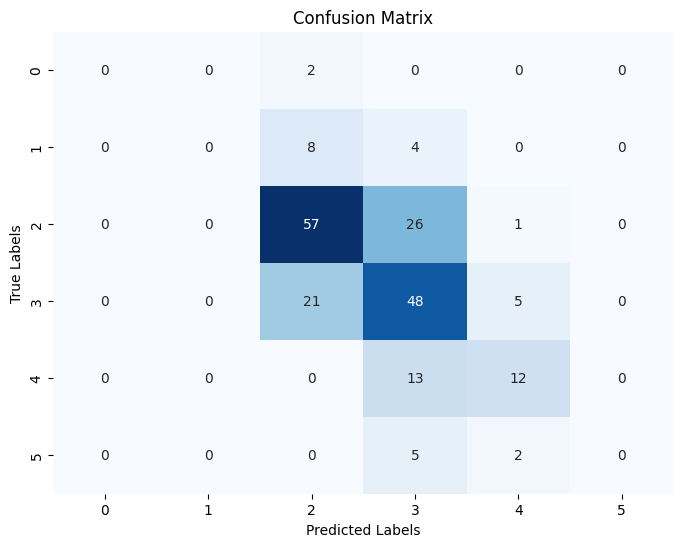

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


